In [2]:
import numpy as np

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2-p1,2)))

In [8]:
import random

def majority_vote(votes):
    """
    Retorna o elemento mais comum no parametro informado
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)

In [14]:
votes = [1,2,3,1,2,3,4,3,2,3,3,2,2,3,1,2,1]
winner = majority_vote(votes)

2

In [15]:
import scipy.stats as ss
def majority_vote_short(votes):
    """
    Retorna o elemento mais comum no parametro informado
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [29]:
votes = [1,2,3,1,2,3,4,3,2,3,3,2,2,3,1,2,1]
majority_vote_short(votes)

array([2.])

In [30]:
a = {'a':2, 'b' : 5}

In [34]:
a.items()

dict_items([('a', 2), ('b', 5)])

In [54]:
random.choice([1])

1

In [56]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

p = np.array([2.5,2])

distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

In [57]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [59]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [61]:
distances[ind[0:2]]

array([0.5, 0.5])

In [63]:
def find_nearest_neighbors(p, points, k=5):
    """
    retorna os indices de KNN
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i]) 
    ind = np.argsort(distances)
    return ind[:k]

In [68]:
ind = find_nearest_neighbors(p, points, 3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [79]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [85]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [86]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [87]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

In [96]:
points.shape[0]

9

In [100]:
def generate_synth_data(n=50):
    """
    Cria dois conjuntos de dados seguindo a distribuição Gaussiana
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

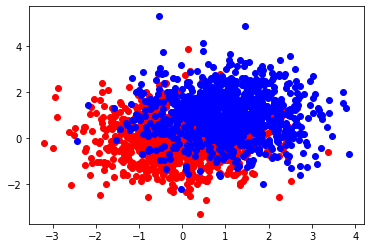

In [111]:
n = 1000
(points, outcomes) = generate_synth_data(n)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")

In [113]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classifica cada ponto no grid
    """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arrange(x_mim, x_max, h)
    ys = np.arrange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcome, k)
            
    return (xx, yy, prediction_grid)